In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 8

In [2]:
data = loadmat('../data/ex8data1.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [3]:
dataset = data['X']
print(dataset.shape)

(300, 2)


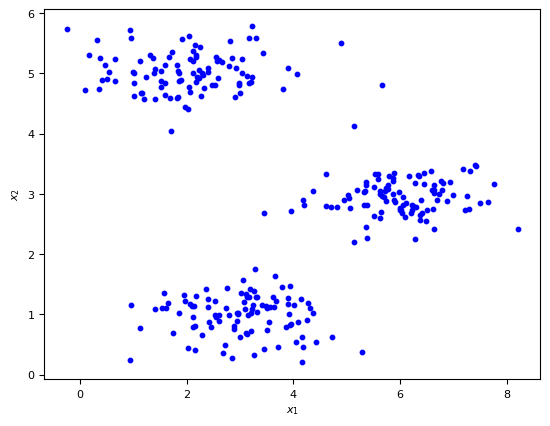

In [4]:
plt.figure()
plt.scatter(dataset[:, 0], dataset[:, 1], color='blue', s=10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

In [5]:
# 数据标准化：通常先对数据进行中心化处理（减去均值），有时还需要缩放到单位方差（标准化）。
# 计算协方差矩阵：协方差矩阵描述了数据中各变量之间的线性关系。
# 求解特征值和特征向量：协方差矩阵的特征向量对应于数据的主成分方向，而特征值表示该方向的方差大小。
# 特征向量通常按对应的特征值大小排序，特征值越大，表示该主成分方向上数据的变异越大。
# 选择主成分：根据特征值选择最重要的几个特征向量，这些就是主成分。

def pca(X, k):
    # 获取数据维度
    d, m = X.shape
    if d < k:
        print('k应该小于特征数')
        return X, None

    # 中心化
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X

    # 计算协方差矩阵
    cov = X_centered.T @ X_centered

    # 计算特征值和特征向量
    eig_values, eig_vectors = np.linalg.eig(cov)

    # 获取最大的k个特征值的下标
    idx = np.argsort(-eig_values)[:k]

    # 对应的特征向量
    W = eig_vectors[:, idx]

    # 降维
    X_projected = X_centered @ W
    return X_projected, W, mean_X

变换矩阵：
 [[ 0.8707906   0.49165407]
 [-0.49165407  0.8707906 ]]


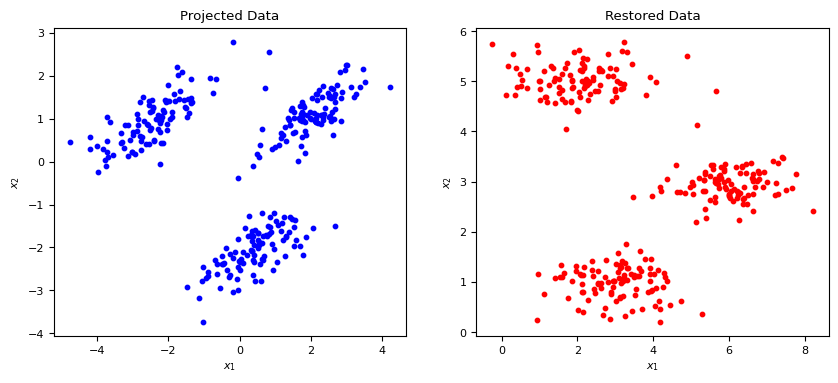

In [7]:
X, W, mean_X = pca(dataset, 2)
print('变换矩阵：\n', W)

# 恢复数据
X_restored = (X @ W.T) + mean_X

# 绘图
plt.figure(figsize=(10, 4))

# 显示降维后的数据
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', s=10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Projected Data')

# 显示恢复后的数据
plt.subplot(1, 2, 2)
plt.scatter(X_restored[:, 0], X_restored[:, 1], color='red', s=10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Restored Data')

plt.show()

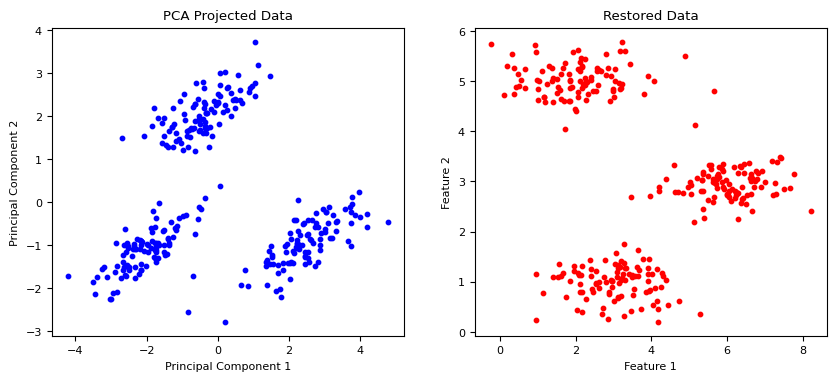

In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 创建PCA对象，指定主成分数k
pca = PCA(n_components=2)

# 拟合数据并降维
X_transformed = pca.fit_transform(dataset)

# 恢复原始数据
X_restored = pca.inverse_transform(X_transformed)

# 可视化降维数据和恢复数据
plt.figure(figsize=(10, 4))

# 显示降维后的数据
plt.subplot(1, 2, 1)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color='blue', s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projected Data')

# 显示恢复后的数据
plt.subplot(1, 2, 2)
plt.scatter(X_restored[:, 0], X_restored[:, 1], color='red', s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Restored Data')

plt.show()

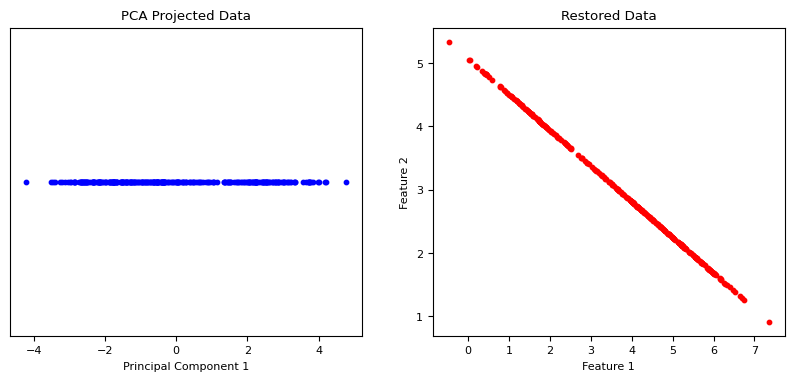

In [9]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 创建PCA对象，指定主成分数为1
pca = PCA(n_components=1)

# 拟合数据并降维
X_transformed = pca.fit_transform(dataset)

# 恢复原始数据
X_restored = pca.inverse_transform(X_transformed)

# 可视化降维数据和恢复数据
plt.figure(figsize=(10, 4))

# 显示降维后的数据
plt.subplot(1, 2, 1)
plt.scatter(X_transformed[:, 0], np.zeros(len(X_transformed)), color='blue', s=10)
plt.xlabel('Principal Component 1')
plt.title('PCA Projected Data')
plt.yticks([])  # 移除y轴的刻度标记，因为它们没有信息

# 显示恢复后的数据
plt.subplot(1, 2, 2)
plt.scatter(X_restored[:, 0], X_restored[:, 1], color='red', s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Restored Data')

plt.show()

In [10]:
def svd_pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [11]:
U, S, V = svd_pca(dataset)

In [12]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [13]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

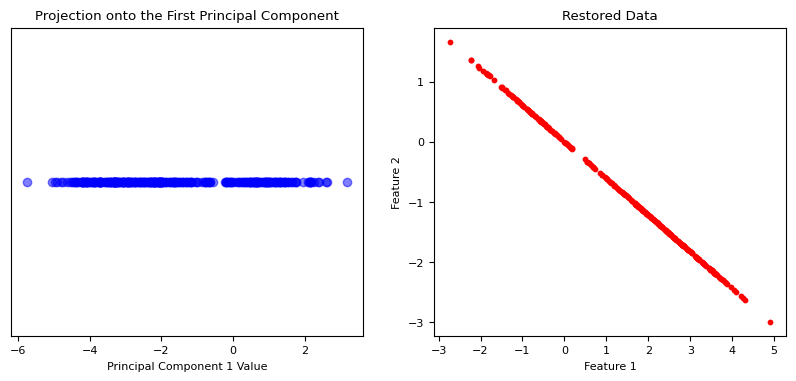

In [16]:
Z = project_data(dataset, U, 1)
X_restored = recover_data(Z, U, 1)


plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.scatter(list(Z[:, 0]), list(np.zeros(Z.shape[0])), alpha=0.5, color='blue')
plt.title('Projection onto the First Principal Component')
plt.xlabel('Principal Component 1 Value')
plt.yticks([])  # 隐藏y轴刻度


plt.subplot(1, 2, 2)
plt.scatter(list(X_restored[:, 0]), list(X_restored[:, 1]), color='red', s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Restored Data')

plt.show()